# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [3]:
df = pd.read_excel("World military power.xlsx","data",header=1)

# EDA

## Implement basic steps to see how is your data looks like

In [4]:
df.head().T

,0,1,2,3,4
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Military Strength Power Index,1.344,2.314,0.466,0.838,0.652
Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Aircraft Strength value,260,19,551,295,227
Fighter/Interceptor Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Fighter/Interceptor Strength value,0,0,103,72,24
Attack Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Attack Aircraft Strength value,25,0,22,18,7
Transport Aircraft Fleet Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Transport Aircraft Fleet Strength value,30,0,59,30,9


remove comma at number values

In [5]:
df.replace(',','', regex=True,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

## Convert multi index columns to one level

In [7]:
df.drop(df.columns[2::2],axis=1, inplace=True)


In [8]:
df.set_index("Military Strength", inplace=True)

In [9]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
Military Strength,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,...,43,0,5500,0,14325743,34940837,652230,0,1200,5987.000
Albania,2.314,19,0,0,0,0,19,0,0,467,...,4,16000,42500,168300000,1519438,3057220,28748,362,41,691.000
Algeria,0.466,551,103,22,59,87,257,45,880,7361,...,157,1306000,325000,12200000000,20741263,41657488,2381741,998,0,6734.000
Angola,0.838,295,72,18,30,47,126,15,379,595,...,176,1666000,82300,8273000000,6244205,30355880,1246700,1600,1300,5369.000
Argentina,0.652,227,24,7,9,64,100,0,370,739,...,1138,479400,685000,2185000000,20179430,44694198,2780400,4989,11000,11968.000


## Detect and drop duplicated columns

In [10]:
df.duplicated().any()

False

In [11]:
df.columns

Index(['Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value',
       '

## Check for missing values 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value 

## Deal with missing values 
In general if a country has no coast border, it has no Navy. So data is representing Navy power either is Nan or 0. The data source https://www.globalfirepower.com/ also represents data as 0 where represented here as NaN. So explore the Navy data and replace NaN values with zero. 

In [13]:
df[["Total Coastline Coverage value","Total Border Coverage value"]] = df[["Total Coastline Coverage value","Total Border Coverage value"]].fillna(0).astype("int")

In [14]:
df[["Total Coastline Coverage value","Total Border Coverage value"]].isnull().any()

Total Coastline Coverage value    False
Total Border Coverage value       False
dtype: bool

---

In [15]:
navy_null_mask =  (df["Navy Fleet Strengths value"]<1) | (df["Navy Fleet Strengths value"].isnull())

In [16]:
df.loc[navy_null_mask,["Navy Fleet Strengths value", "Total Coastline Coverage value","Total Waterway Coverage value" ] ]

,Navy Fleet Strengths value,Total Coastline Coverage value,Total Waterway Coverage value
Military Strength,,,
Afghanistan,0.000,0,1200
Armenia,0.000,0,0
Austria,0.000,0,0
Belarus,0.000,0,2500
Bhutan,0.000,0,0
Bosnia and Herzegovina,0.000,20,0
Botswana,NaN,0,0
Burkina Faso,NaN,0,0
Central African Republic,NaN,0,2800


In [17]:
df["Navy Fleet Strengths value"] = df["Navy Fleet Strengths value"].fillna(0).astype("int")

In [18]:
df["Navy Fleet Strengths value"].isnull().any()

False

---

In [19]:
navy_coln_mask =["Frigate Fleet Strength value","Destroyer Fleet Strength value","Submarine Fleet Strength value","Aircraft Carrier Fleet Strength value"]

In [20]:
df[navy_coln_mask] = df[navy_coln_mask].fillna(0).astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value 

## Fix the dtypes

In [22]:
df.sample(10).T

Military Strength,Honduras,Colombia,Estonia,France,Moldova,Spain,Pakistan,Turkey,Kazakhstan,Chad
Military Strength Power Index,2.094,0.605,2.589,0.17,2.129,0.339,0.236,0.21,0.91,1.638
Aircraft Strength value,46,469,7,1229,3,512,1372,1055,222,35
Fighter/Interceptor Strength value,3,21,0,269,0,137,356,206,76,0
Attack Aircraft Strength value,9,38,0,0,0,12,90,0,39,6
Transport Aircraft Fleet Strength value,11,76,2,121,1,46,49,80,18,6
Trainer Aircraft Fleet value,10,80,5,187,0,162,513,276,18,4
Helicopter Fleet Strength value,12,224,4,589,2,162,346,497,71,17
Attack Helicopter Fleet Strength value,0,0,0,62,0,19,56,100,18,3
Tank Strength value,19,0,0,528,0,327,2200,2622,650,60
AFV/APC Strength value,92,595,181,6028,341,2023,7330,8777,800,372


In [23]:
object_columns = df.columns[df.dtypes=="object"]
object_columns

Index(['defense spending budget value', 'External Debt value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Waterway Coverage value'],
      dtype='object')

In [24]:
df[object_columns].head(10)

,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
Military Strength,,,,,,,,,
Afghanistan,12000000000,2840000000,0,5500,0,14325743,34940837,652230,1200
Albania,250000000,9505000000,16000,42500,168300000,1519438,3057220,28748,41
Algeria,13000000000,6260000000,1306000,325000,12200000000,20741263,41657488,2381741,0
Angola,7000000000,42080000000,1666000,82300,8273000000,6244205,30355880,1246700,1300
Argentina,4200000000,214900000000,479400,685000,2185000000,20179430,44694198,2780400,11000
Armenia,1385000000,10410000000,0,47500,0,1696085,3038217,29743,0
Australia,26300000000,1714000000000,263000,1005000,1821000000,10808002,23470145,7741220,2000
Austria,3380000000,630800000000,14260,215000,43000000,4017691,8793370,83871,0
Azerbaijan,2805000000,17410000000,789300,180000,7000000000,5042346,10046516,86600,0


In [25]:
df[['defense spending budget value', 'External Debt value','Proven Oil Reserves value']] = df[['defense spending budget value', 'External Debt value','Proven Oil Reserves value']].astype("int64")

In [26]:
object_columns = df.columns[df.dtypes=="object"]
object_columns

Index(['Oil Production value', 'Oil Consumption value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Waterway Coverage value'],
      dtype='object')

In [27]:
df[object_columns] = df[object_columns].astype("int")

In [28]:
df.dtypes

Military Strength Power Index              float64
Aircraft Strength value                      int64
Fighter/Interceptor Strength value           int64
Attack Aircraft Strength value               int64
Transport Aircraft Fleet Strength value      int64
Trainer Aircraft Fleet value                 int64
Helicopter Fleet Strength value              int64
Attack Helicopter Fleet Strength value       int64
Tank Strength value                          int64
AFV/APC Strength value                       int64
Self-Propelled Artillery Strength value      int64
Towed Artillery Strength value               int64
Rocket Projector Strength value              int64
Navy Fleet Strengths value                   int32
Aircraft Carrier Fleet Strength value        int32
Submarine Fleet Strength value               int32
Destroyer Fleet Strength value               int32
Frigate Fleet Strength value                 int32
defense spending budget value                int64
External Debt value            

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [29]:
df.drop(df.columns[-4:],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value 

## Visualy inspect the some features

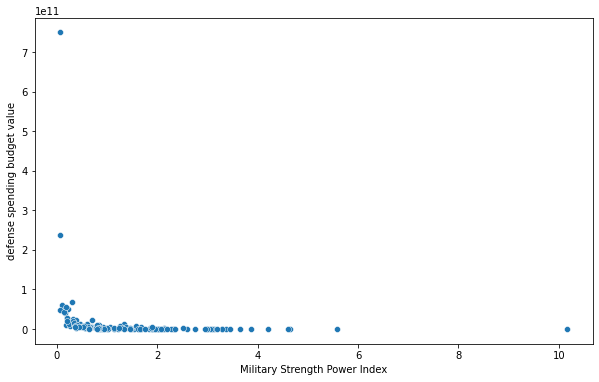

In [31]:
sns.scatterplot(data=df, y="defense spending budget value",x="Military Strength Power Index");

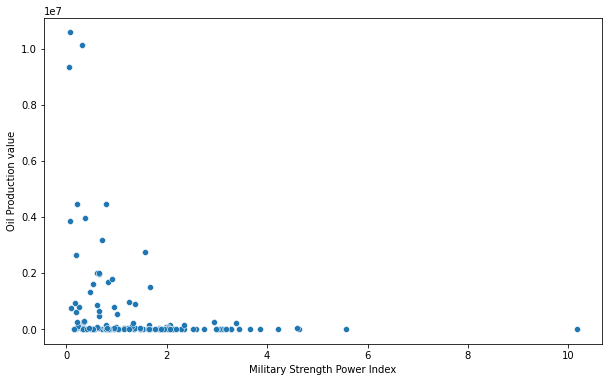

In [32]:
sns.scatterplot(data=df, y="Oil Production value",x="Military Strength Power Index");

<AxesSubplot:xlabel='Military Strength Power Index', ylabel='Proven Oil Reserves value'>

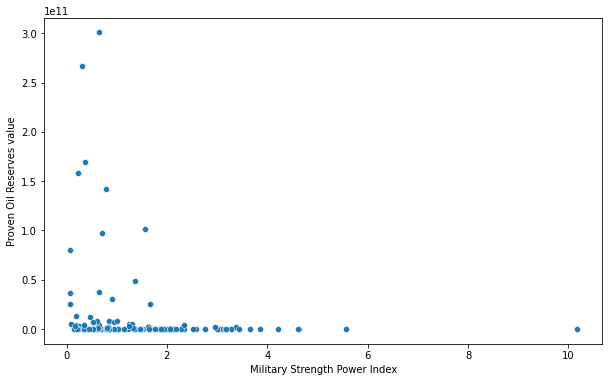

In [33]:
sns.scatterplot(data=df, y="Proven Oil Reserves value",x="Military Strength Power Index")

## Decriptive statistics

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
Aircraft Strength value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
Fighter/Interceptor Strength value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
Attack Aircraft Strength value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
Transport Aircraft Fleet Strength value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
Trainer Aircraft Fleet value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
Helicopter Fleet Strength value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
Attack Helicopter Fleet Strength value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
Tank Strength value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
AFV/APC Strength value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


# Data Preprocessing

In [35]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns =df.columns)

In [36]:
pd.DataFrame(X).describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
count,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,...,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,...,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004
min,-1.061,-0.316,-0.355,-0.274,-0.329,-0.345,-0.297,-0.264,-0.428,-0.461,...,-0.187,-0.486,-0.208,-0.282,-0.238,-0.353,-0.324,-0.280,-0.301,-0.320
25%,-0.672,-0.290,-0.355,-0.274,-0.296,-0.328,-0.268,-0.264,-0.415,-0.415,...,-0.187,-0.486,-0.204,-0.277,-0.212,-0.353,-0.310,-0.280,-0.271,-0.288
50%,-0.323,-0.226,-0.281,-0.274,-0.231,-0.237,-0.212,-0.244,-0.327,-0.325,...,-0.187,-0.486,-0.177,-0.261,-0.184,-0.345,-0.263,-0.279,-0.231,-0.225
75%,0.425,-0.080,-0.092,-0.106,-0.046,-0.015,-0.053,-0.081,-0.139,-0.090,...,-0.187,0.177,-0.105,-0.183,-0.115,-0.218,-0.163,-0.233,-0.094,-0.076
max,6.600,10.489,8.730,7.605,9.944,10.670,10.832,9.708,8.148,6.820,...,9.789,8.130,10.974,9.449,10.941,6.017,8.930,6.784,8.639,8.094


# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [37]:
from pyclustertend import hopkins

In [38]:
hopkins(X, X.shape[0])

0.07599261879349382

## Clustering with K-means

In [39]:
from sklearn.cluster import KMeans

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [40]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

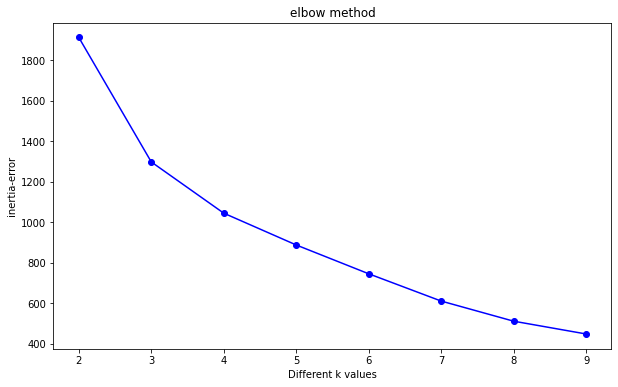

In [41]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [42]:
ssd

[1911.0076460430041,
 1296.9467409218043,
 1044.2015097931896,
 887.327821560553,
 745.2068066540269,
 610.6455812399118,
 511.3419393774911,
 448.23904880639094]

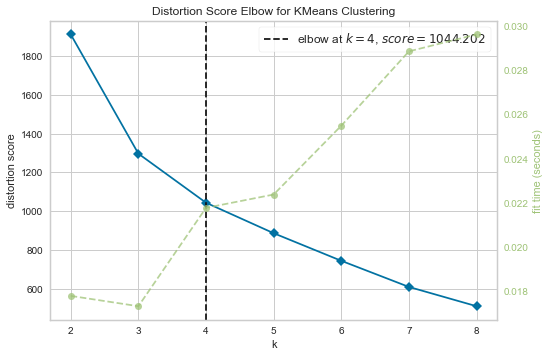

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8635930041608607
For n_clusters=3, the silhouette score is 0.8181360267920251
For n_clusters=4, the silhouette score is 0.4866786063460757
For n_clusters=5, the silhouette score is 0.5090371213213999
For n_clusters=6, the silhouette score is 0.5099407976429824
For n_clusters=7, the silhouette score is 0.47549187252626846
For n_clusters=8, the silhouette score is 0.46564969139552


selecting k=3 is a good option

### Model Building and label visualisation

In [102]:
model = KMeans(n_clusters=3, random_state=42)
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [103]:
X2=X.copy()

In [104]:
X2["clusters"] = model.labels_

In [105]:
df2 = df.copy()

In [106]:
df2["clusters"] = model.labels_

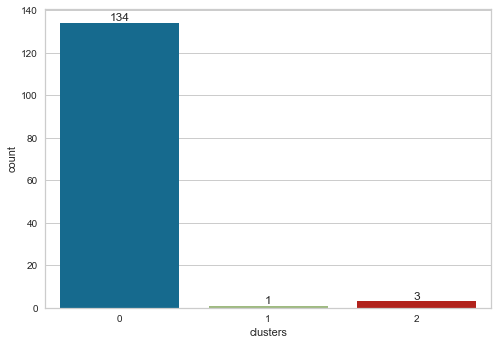

In [107]:
ax = sns.countplot(x="clusters", data=df2)
ax.bar_label(ax.containers[0]);

### Evaluate 

In [108]:
df2.groupby("clusters")["Military Strength Power Index"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,134.000,1.502,1.321,0.150,0.609,1.141,2.028,10.168
1,1.000,0.061,NaN,0.061,0.061,0.061,0.061,0.061
2,3.000,0.077,0.015,0.068,0.069,0.069,0.082,0.095


In [109]:
df2.groupby("clusters")["defense spending budget value"].mean()

clusters
0     6232247511.097
1   750000000000.000
2   115333333333.333
Name: defense spending budget value, dtype: float64

<AxesSubplot:xlabel='clusters', ylabel='Military Strength Power Index'>

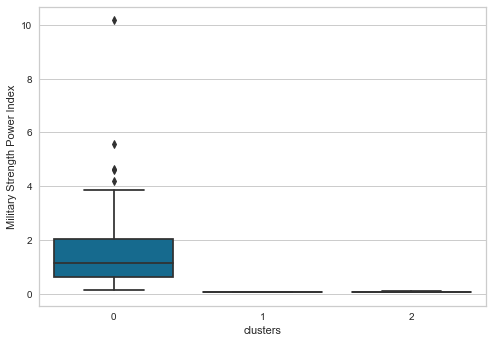

In [110]:
sns.boxplot(y="Military Strength Power Index" , x="clusters", data=df2)

### Dendogram

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [112]:
hc = linkage(X)

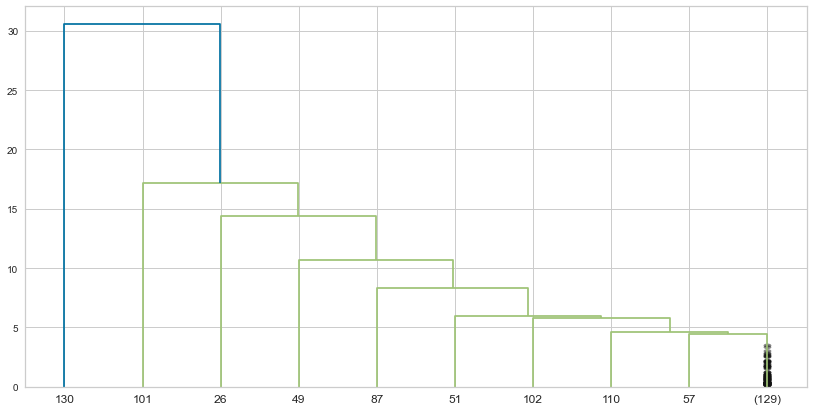

In [113]:
plt.figure(figsize = (14,7))
dendrogram(hc, show_contracted = True,truncate_mode = "lastp", p=10);   

### Model Building and label visualisation

In [114]:
from sklearn.cluster import AgglomerativeClustering

In [115]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)


In [116]:
X3 = X.copy()
df3 = df.copy()
X3["clusters"] = clusters
df3["clusters"] = clusters

### Evaluate 

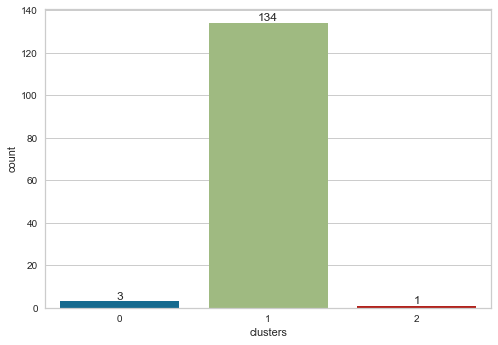

In [117]:
ax = sns.countplot(x="clusters", data=df3)
ax.bar_label(ax.containers[0]);

In [118]:
df3.groupby("clusters")["Military Strength Power Index"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,3.000,0.077,0.015,0.068,0.069,0.069,0.082,0.095
1,134.000,1.502,1.321,0.150,0.609,1.141,2.028,10.168
2,1.000,0.061,NaN,0.061,0.061,0.061,0.061,0.061


In [119]:
df3.groupby("clusters")["defense spending budget value"].mean()

clusters
0   115333333333.333
1     6232247511.097
2   750000000000.000
Name: defense spending budget value, dtype: float64

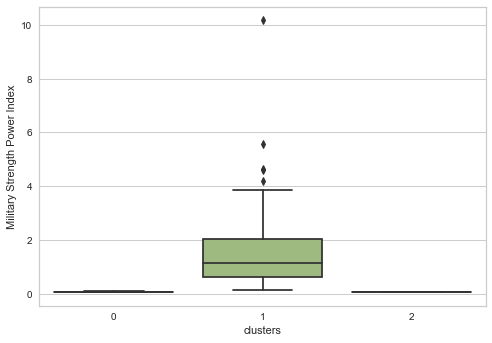

In [120]:
sns.boxplot(y="Military Strength Power Index" , x="clusters", data=df3);

---

In [121]:
pd.crosstab(df2.clusters, df3.clusters)

clusters,0,1,2
clusters,,,
0,0,134,0
1,0,0,1
2,3,0,0


## Conclusion

Both K-means and Hierarchical Clustering with 3 clusters resulted in same clustering.

* Most powerfull cluster

In [122]:
df[df2.clusters==1].index

Index(['United States'], dtype='object', name='Military Strength')

* Powerfull cluster

In [123]:
df[df2.clusters==2].index

Index(['China', 'India', 'Russia'], dtype='object', name='Military Strength')

* Modarate or weak cluster

In [124]:
df[df2.clusters==3].index

Index([], dtype='object', name='Military Strength')